In [2]:
#Pre-Processing and Trainning

In [3]:
# load the data
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [46]:
# Upload the data
data2 = pd.read_csv('AmazonSales1.csv',low_memory=False)

In [47]:
data2.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by
0,4,4/30/2022,Shipped,Merchant,Amazon,1,Top,3XL,1,INR,574.0,CHENNAI,600073.0,IN,NaN
1,8,4/30/2022,Cancelled,Merchant,Amazon,1,Set,3XL,0,NaN,NaN,HYDERABAD,500008.0,IN,NaN
2,20,4/30/2022,Shipped,Amazon,Amazon,1,kurta,3XL,1,INR,517.0,TIRUCHIRAPPALLI,620018.0,IN,NaN
3,41,4/30/2022,Shipped,Merchant,Amazon,1,Western Dress,3XL,1,INR,885.0,JABALPUR,482002.0,IN,NaN
4,69,4/30/2022,Shipped,Amazon,Amazon,1,Set,3XL,1,INR,1146.0,VIJAPURA,586201.0,IN,NaN


In [48]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             128975 non-null  int64  
 1   Date              128975 non-null  object 
 2   Status            128975 non-null  object 
 3   FulfilmentB       128975 non-null  object 
 4   Fulfilment        128975 non-null  object 
 5   Fulfilment_dum    128975 non-null  int64  
 6   Category          128975 non-null  object 
 7   Size              128975 non-null  object 
 8   Qty               128975 non-null  int64  
 9   currency          121180 non-null  object 
 10  Amount            121180 non-null  float64
 11  ship-city         128942 non-null  object 
 12  ship-postal-code  128942 non-null  float64
 13  ship-country      128942 non-null  object 
 14  fulfilled-by      39277 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 14.8+ MB


In [49]:
data2.dtypes

index                 int64
Date                 object
Status               object
FulfilmentB          object
Fulfilment           object
Fulfilment_dum        int64
Category             object
Size                 object
Qty                   int64
currency             object
Amount              float64
ship-city            object
ship-postal-code    float64
ship-country         object
fulfilled-by         object
dtype: object

In [50]:
data2.isnull().sum()

index                   0
Date                    0
Status                  0
FulfilmentB             0
Fulfilment              0
Fulfilment_dum          0
Category                0
Size                    0
Qty                     0
currency             7795
Amount               7795
ship-city              33
ship-postal-code       33
ship-country           33
fulfilled-by        89698
dtype: int64

In [51]:
data2 = data2.dropna()
data2.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by
89698,1,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,406.0,BENGALURU,560085.0,IN,Easy Ship
89699,26,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,299.0,BILASPUR,495001.0,IN,Easy Ship
89701,85,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,Bottom,3XL,1,INR,377.0,KOLKATA,700078.0,IN,Easy Ship
89702,92,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,725.0,CHENNAI,600028.0,IN,Easy Ship
89703,129,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,579.0,BENGALURU,560055.0,IN,Easy Ship


In [52]:
# Let's dropped variables " Fulfilment and Fulfilment_dum created from the Excell file
#data.drop(['Fulfilment','Fulfilment_dum'], axis=1, inplace=True)
data2.drop(['Fulfilment','Fulfilment_dum'], axis=1, inplace=True)
data2.head()

,index,Date,Status,FulfilmentB,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by
89698,1,4/30/2022,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,INR,406.0,BENGALURU,560085.0,IN,Easy Ship
89699,26,4/30/2022,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,INR,299.0,BILASPUR,495001.0,IN,Easy Ship
89701,85,4/30/2022,Shipped - Delivered to Buyer,Amazon,Bottom,3XL,1,INR,377.0,KOLKATA,700078.0,IN,Easy Ship
89702,92,4/30/2022,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,INR,725.0,CHENNAI,600028.0,IN,Easy Ship
89703,129,4/30/2022,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,INR,579.0,BENGALURU,560055.0,IN,Easy Ship


In [53]:
# Cleaning, transforming and visualizing
# Check out the column names
data2.columns

Index(['index', 'Date', 'Status', 'FulfilmentB', 'Category', 'Size', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-postal-code', 'ship-country',
       'fulfilled-by'],
      dtype='object')

In [54]:
#Check for duplicated rows
duplicateRowsDF = data2[data2.duplicated()]
duplicateRowsDF

,index,Date,Status,FulfilmentB,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by


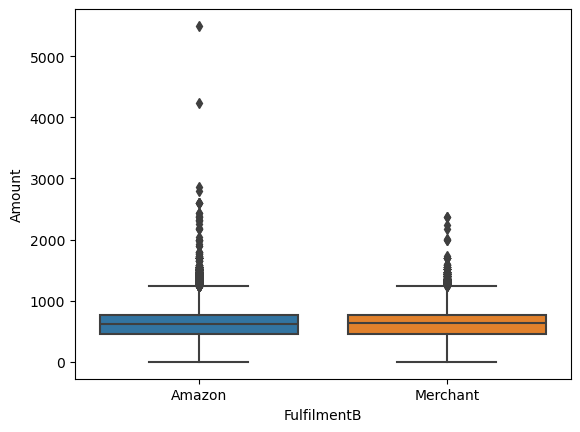

In [22]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_last_week
_ = sns.boxplot(x='FulfilmentB', y='Amount', data=NoPrediction)

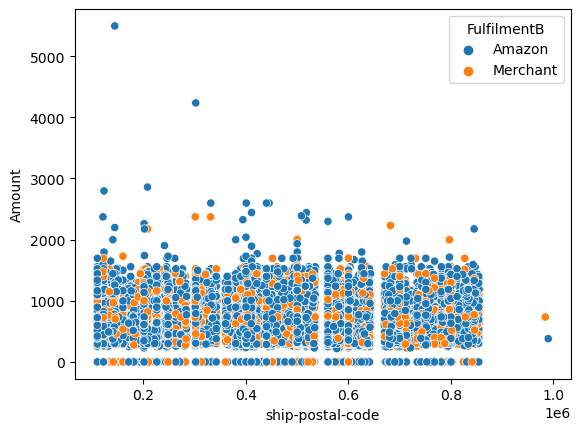

In [24]:
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
_ = sns.scatterplot(x='ship-postal-code', y='Amount', data=NoPrediction, hue='FulfilmentB')

In [55]:
# Print the categorical columns and their associated levels.
dfo = data2.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,Date,91
1,Status,11
2,FulfilmentB,2
3,Category,8
4,Size,11
5,currency,1
6,ship-city,4702
7,ship-country,1
8,fulfilled-by,1


In [73]:
# Plot the correlation heat map for the features.
# Since the data come from India, it is obvious that the currency and country will remain the same.
#Let's dropped variables currency and ship-country as well as ship-city, and Fulfilled-by
#data.drop(['currency','ship-city','ship-country','Size','fulfilled-by'], axis=1, inplace=True)
data2.drop(['Date'], axis=1, inplace=True)
data2.head()

,index,Status,FulfilmentB,Category,Size,Qty,Amount,ship-postal-code
89698,1,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,406.0,560085.0
89699,26,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,299.0,495001.0
89701,85,Shipped - Delivered to Buyer,Amazon,Bottom,3XL,1,377.0,700078.0
89702,92,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,725.0,600028.0
89703,129,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,579.0,560055.0


In [74]:
# Let's create the dummies variables
#date1 =pd.get_dummies(date1, dtype=int)
date2 =pd.get_dummies(data2, dtype=int)
date2

,index,Qty,Amount,ship-postal-code,Status_Cancelled,Status_Pending,Status_Pending - Waiting for Pick Up,Status_Shipped - Damaged,Status_Shipped - Delivered to Buyer,Status_Shipped - Lost in Transit,...,Size_4XL,Size_5XL,Size_6XL,Size_Free,Size_L,Size_M,Size_S,Size_XL,Size_XS,Size_XXL
89698,1,1,406.0,560085.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
89699,26,1,299.0,495001.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
89701,85,1,377.0,700078.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
89702,92,1,725.0,600028.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
89703,129,1,579.0,560055.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128830,1,791.0,302004.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
128971,128859,1,459.0,500086.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
128972,128860,1,487.0,500086.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
128973,128864,1,791.0,690507.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
date2.shape

(37528, 36)

In [76]:
date2.dtypes

index                                     int64
Qty                                       int64
Amount                                  float64
ship-postal-code                        float64
Status_Cancelled                          int32
Status_Pending                            int32
Status_Pending - Waiting for Pick Up      int32
Status_Shipped - Damaged                  int32
Status_Shipped - Delivered to Buyer       int32
Status_Shipped - Lost in Transit          int32
Status_Shipped - Out for Delivery         int32
Status_Shipped - Picked Up                int32
Status_Shipped - Rejected by Buyer        int32
Status_Shipped - Returned to Seller       int32
Status_Shipped - Returning to Seller      int32
FulfilmentB_Amazon                        int32
FulfilmentB_Merchant                      int32
Category_Blouse                           int32
Category_Bottom                           int32
Category_Ethnic Dress                     int32
Category_Saree                          

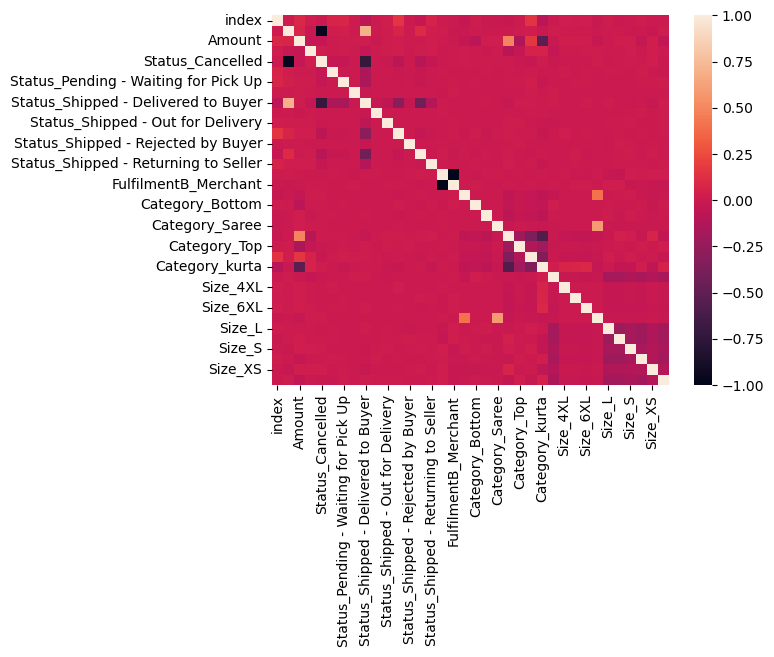

In [77]:
# Make a heatmap of the data 
correlation_matrix = date2.corr()
_ = sns.heatmap(correlation_matrix)

In [ ]:
# Modeling
# Data splitting for Linear Regression analysis


In [78]:
# Subsetting our data into our dependent and independent variables.
y = date2['ship-postal-code']
X = date2[['Amount']]

# Split the data. This line uses the sklearn function train_test_split().
# The test_size parameter means we can train with 75% of the data, and test on 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [79]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(28146, 1)
(9382, 1)
(28146,)
(9382,)


In [ ]:
# Data splitting for  Random Forest testing

In [162]:
#path= r"C:\Users\sejad\OneDrive\Desktop\Springboard folders\DecisionTrees\RRDinerCoffeeData.csv"
#df = pd.read_csv(path)
#df.head()


In [115]:

# Let's reload the data without dummies transformation
# Upload the data
data3 = pd.read_csv('AmazonSales1.csv',low_memory=False)
data3.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by
0,4,4/30/2022,Shipped,Merchant,Amazon,1,Top,3XL,1,INR,574.0,CHENNAI,600073.0,IN,NaN
1,8,4/30/2022,Cancelled,Merchant,Amazon,1,Set,3XL,0,NaN,NaN,HYDERABAD,500008.0,IN,NaN
2,20,4/30/2022,Shipped,Amazon,Amazon,1,kurta,3XL,1,INR,517.0,TIRUCHIRAPPALLI,620018.0,IN,NaN
3,41,4/30/2022,Shipped,Merchant,Amazon,1,Western Dress,3XL,1,INR,885.0,JABALPUR,482002.0,IN,NaN
4,69,4/30/2022,Shipped,Amazon,Amazon,1,Set,3XL,1,INR,1146.0,VIJAPURA,586201.0,IN,NaN


In [116]:
#Counts of null values 
na_df=pd.DataFrame(data3.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,fulfilled-by,89698
1,currency,7795
2,Amount,7795
3,ship-city,33
4,ship-postal-code,33
5,ship-country,33


In [117]:
#counts of response variable values
data3.Fulfilment.value_counts()

Fulfilment
Amazon      89698
Merchant    39277
Name: count, dtype: int64

In [118]:
# Print the number of missing values by column.
data3.isnull().sum()

index                   0
Date                    0
Status                  0
FulfilmentB             0
Fulfilment              0
Fulfilment_dum          0
Category                0
Size                    0
Qty                     0
currency             7795
Amount               7795
ship-city              33
ship-postal-code       33
ship-country           33
fulfilled-by        89698
dtype: int64

In [120]:
data3=data3.dropna()
data3.head()

,index,Date,Status,FulfilmentB,Fulfilment,Fulfilment_dum,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country,fulfilled-by
89698,1,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,406.0,BENGALURU,560085.0,IN,Easy Ship
89699,26,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,299.0,BILASPUR,495001.0,IN,Easy Ship
89701,85,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,Bottom,3XL,1,INR,377.0,KOLKATA,700078.0,IN,Easy Ship
89702,92,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,725.0,CHENNAI,600028.0,IN,Easy Ship
89703,129,4/30/2022,Shipped - Delivered to Buyer,Amazon,Merchant,0,kurta,3XL,1,INR,579.0,BENGALURU,560055.0,IN,Easy Ship


In [121]:
# dropp Fulfilment, Fulfilment_dum, and fulfilled-by
#data.drop(['Fulfilment', 'Fulfilment_dum','fulfilled-by'], axis=1, inplace=True)
data3.drop(['Fulfilment', 'Fulfilment_dum','fulfilled-by'], axis=1, inplace=True)
data3.head()

,index,Date,Status,FulfilmentB,Category,Size,Qty,currency,Amount,ship-city,ship-postal-code,ship-country
89698,1,4/30/2022,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,INR,406.0,BENGALURU,560085.0,IN
89699,26,4/30/2022,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,INR,299.0,BILASPUR,495001.0,IN
89701,85,4/30/2022,Shipped - Delivered to Buyer,Amazon,Bottom,3XL,1,INR,377.0,KOLKATA,700078.0,IN
89702,92,4/30/2022,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,INR,725.0,CHENNAI,600028.0,IN
89703,129,4/30/2022,Shipped - Delivered to Buyer,Amazon,kurta,3XL,1,INR,579.0,BENGALURU,560055.0,IN


In [122]:
# Replace Fulfilment "Amazon and Merchant"  by 1 and 0
data3.loc[data3['FulfilmentB'] == 'Amazon','FulfilmentB'] = 1
data3.loc[data3['FulfilmentB'] == 'Merchant', 'FulfilmentB'] = 0

In [123]:
# Check that our replacing those values with 1 and 0 worked, with unique()
data3['FulfilmentB'].unique()

array([1, 0], dtype=object)

In [125]:
# data3 = data3.drop(['Date','currency','ship-city','ship-country'],axis =1)
data3 = data3.drop(['Date','currency','ship-city','ship-country'],axis =1)

In [126]:
data3.head()

,index,Status,FulfilmentB,Category,Size,Qty,Amount,ship-postal-code
89698,1,Shipped - Delivered to Buyer,1,kurta,3XL,1,406.0,560085.0
89699,26,Shipped - Delivered to Buyer,1,kurta,3XL,1,299.0,495001.0
89701,85,Shipped - Delivered to Buyer,1,Bottom,3XL,1,377.0,700078.0
89702,92,Shipped - Delivered to Buyer,1,kurta,3XL,1,725.0,600028.0
89703,129,Shipped - Delivered to Buyer,1,kurta,3XL,1,579.0,560055.0


In [127]:
# Create dummies features for the categorical variables.
features=['Status','Category','Size']
dummies=pd.get_dummies(data3[features])
merged=pd.concat([data3,dummies],axis=1)
final=merged.drop(['Status','Category','Size'], axis=1)
data3=final
data3.head()

,index,FulfilmentB,Qty,Amount,ship-postal-code,Status_Cancelled,Status_Pending,Status_Pending - Waiting for Pick Up,Status_Shipped - Damaged,Status_Shipped - Delivered to Buyer,Status_Shipped - Lost in Transit,Status_Shipped - Out for Delivery,Status_Shipped - Picked Up,Status_Shipped - Rejected by Buyer,Status_Shipped - Returned to Seller,Status_Shipped - Returning to Seller,Category_Blouse,Category_Bottom,Category_Ethnic Dress,Category_Saree,Category_Set,Category_Top,Category_Western Dress,Category_kurta,Size_3XL,Size_4XL,Size_5XL,Size_6XL,Size_Free,Size_L,Size_M,Size_S,Size_XL,Size_XS,Size_XXL
89698,1,1,1,406.0,560085.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
89699,26,1,1,299.0,495001.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
89701,85,1,1,377.0,700078.0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
89702,92,1,1,725.0,600028.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False
89703,129,1,1,579.0,560055.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False


In [137]:
from sklearn.model_selection import train_test_split

# dont forget to define your X and y
X= data3.drop(['FulfilmentB'],axis=1)
y=data3['FulfilmentB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
y=y.astype('int')
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [138]:
#Scale data to prep for model creation
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# Data slplitting for Decision Tree

In [141]:
#Train/test split
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData
NoPrediction = data3.dropna()
NoPrediction['FulfilmentB'].describe()

count     37528
unique        2
top           1
freq      27627
Name: FulfilmentB, dtype: int64

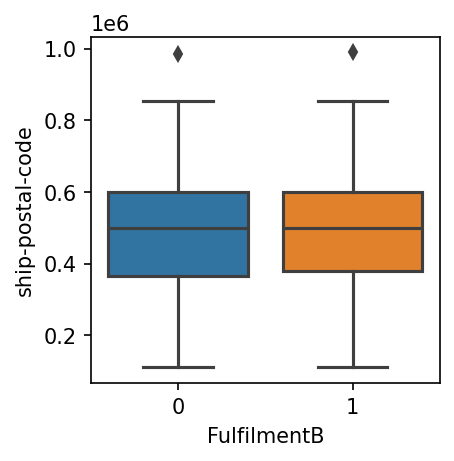

In [142]:
_ = sns.boxplot(x='FulfilmentB', y='ship-postal-code', data=NoPrediction)

In [191]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus
import pydot
from sklearn.tree import plot_tree, export_text
fig = plt.figure(figsize=(25,20))

<Figure size 3750x3000 with 0 Axes>

In [192]:
# Check the names of the columns of NOPrediction
NoPrediction.columns

Index(['index', 'FulfilmentB', 'Qty', 'Amount', 'ship-postal-code',
       'Status_Cancelled', 'Status_Pending',
       'Status_Pending - Waiting for Pick Up', 'Status_Shipped - Damaged',
       'Status_Shipped - Delivered to Buyer',
       'Status_Shipped - Lost in Transit', 'Status_Shipped - Out for Delivery',
       'Status_Shipped - Picked Up', 'Status_Shipped - Rejected by Buyer',
       'Status_Shipped - Returned to Seller',
       'Status_Shipped - Returning to Seller', 'Category_Blouse',
       'Category_Bottom', 'Category_Ethnic Dress', 'Category_Saree',
       'Category_Set', 'Category_Top', 'Category_Western Dress',
       'Category_kurta', 'Size_3XL', 'Size_4XL', 'Size_5XL', 'Size_6XL',
       'Size_Free', 'Size_L', 'Size_M', 'Size_S', 'Size_XL', 'Size_XS',
       'Size_XXL'],
      dtype='object')

In [193]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "Decision"
features = [column for column in NoPrediction.columns if column != 'FulfilmentB']

In [194]:
# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = NoPrediction[features] 

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = NoPrediction['FulfilmentB']

In [ ]:
#Get the subset of AmazonSales data with null values in the FulfilmentB column, and save that subset as Prediction


In [195]:
# Get just those rows whose value for the Decision column is null  
Prediction = data3[data3['FulfilmentB'].isnull()]

In [196]:
# One-hot encode all features in X.
X_train = pd.get_dummies(X_train)

# Do the same, but for X_test
X_test = pd.get_dummies(X_test) 

In [199]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 1000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)
y=[int(label) for label in y]